In [7]:
FILENAME = 'sample_airbnbitaly_dm.csv' 

C:\Users\fahad\AppData\Local\Temp\ipykernel_16352\410745783.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=4)


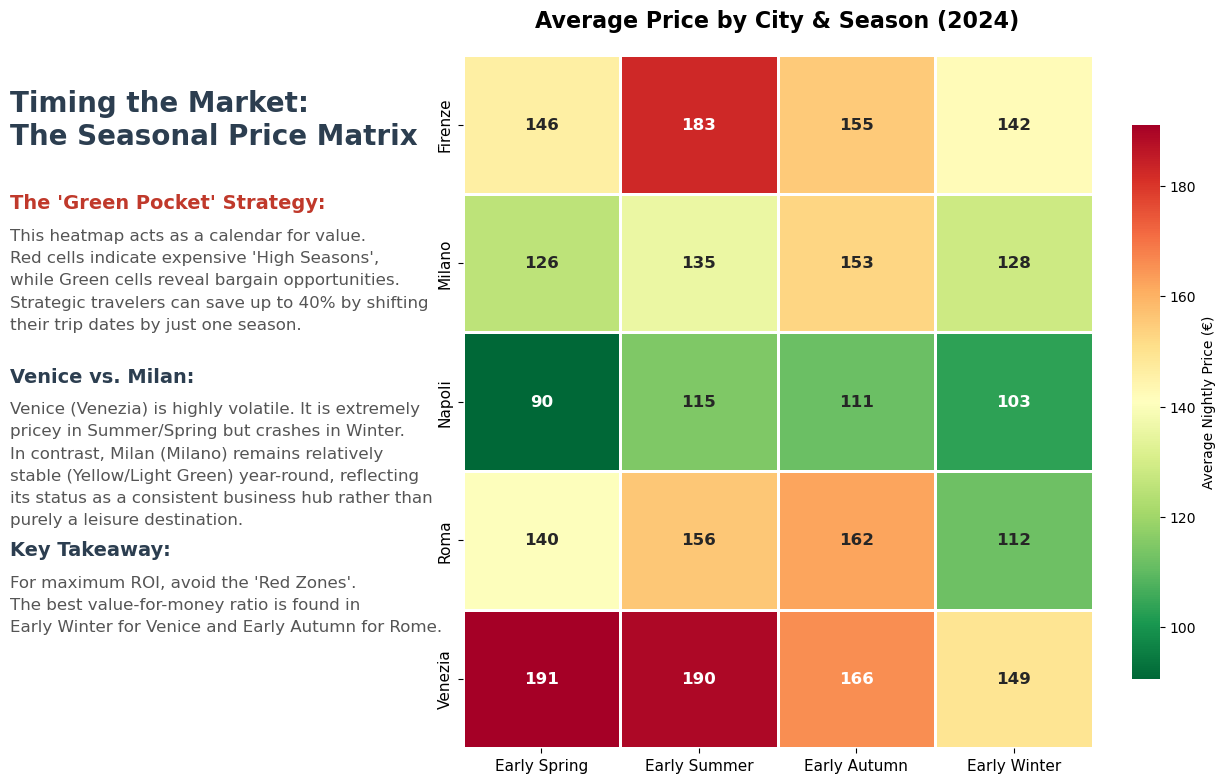

C:\Users\fahad\AppData\Local\Temp\ipykernel_16352\410745783.py:182: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


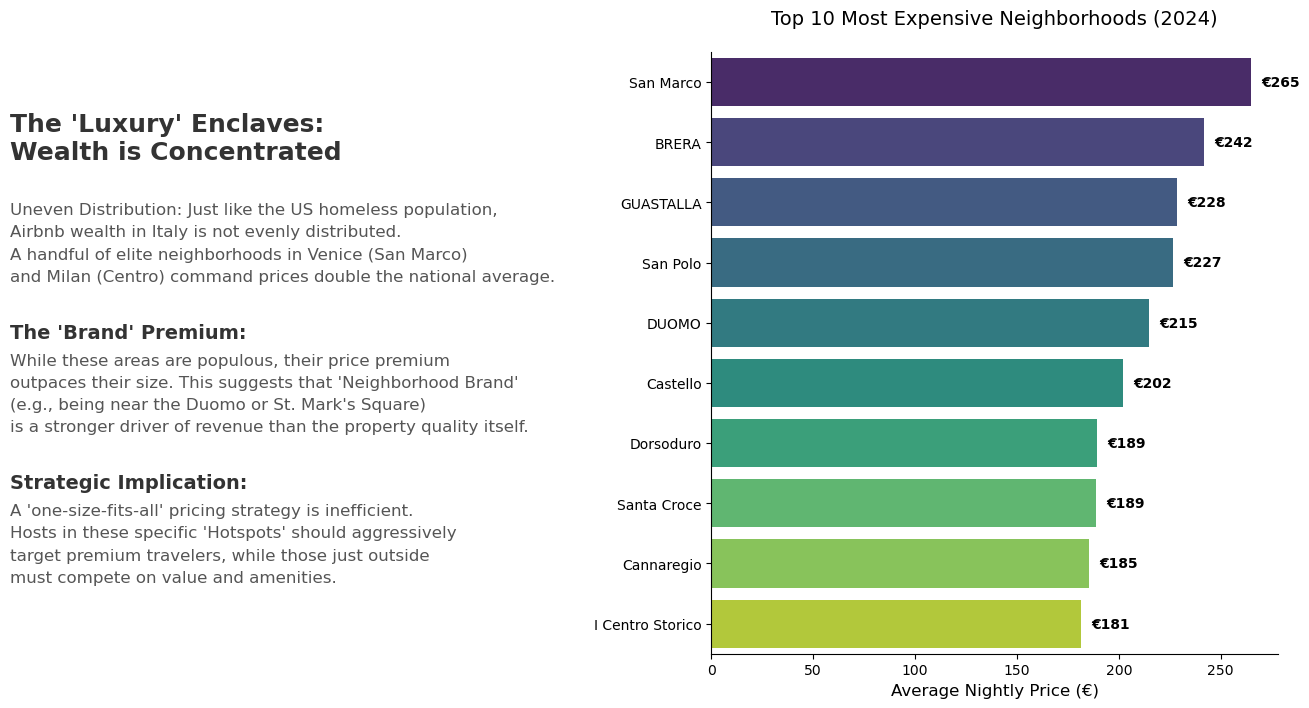

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================================================================
# 1. DATA PREP
# ==============================================================================
df_final = pd.read_csv(FILENAME, encoding='latin1') # Uncomment to load

# Clean Data
col_city = 'City'
col_season = 'Season'
col_price = 'Price'

df_viz = df_final.copy()
df_viz = df_viz[df_viz[col_price] < 600] # Remove outliers

# Prepare Data Matrix: City vs Season
pivot_season = df_viz.groupby([col_city, col_season])[col_price].mean().unstack()

# Reorder columns logically (Spring -> Winter)
preferred_order = ['Spring', 'Early Spring', 'Summer', 'Early Summer', 'Autumn', 'Early Autumn', 'Winter', 'Early Winter']
existing_order = [c for c in preferred_order if c in pivot_season.columns]
if existing_order:
    pivot_season = pivot_season[existing_order]

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT
# ==============================================================================
fig = plt.figure(figsize=(16, 9), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 2], wspace=0.1) # Text (1/3), Chart (2/3)

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off')

# 1. Title
ax_text.text(0, 0.95, "Timing the Market:\nThe Seasonal Price Matrix", 
             fontsize=20, fontweight='bold', color='#2c3e50', va='top')

# 2. Insight 1: The Concept
ax_text.text(0, 0.80, "The 'Green Pocket' Strategy:", 
             fontsize=14, fontweight='bold', color='#c0392b', va='top') # Red accent

text_1 = (
    "This heatmap acts as a calendar for value.\n"
    "Red cells indicate expensive 'High Seasons',\n"
    "while Green cells reveal bargain opportunities.\n"
    "Strategic travelers can save up to 40% by shifting\n"
    "their trip dates by just one season."
)
ax_text.text(0, 0.75, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Insight 2: City Specifics
ax_text.text(0, 0.55, "Venice vs. Milan:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_2 = (
    "Venice (Venezia) is highly volatile. It is extremely\n"
    "pricey in Summer/Spring but crashes in Winter.\n"
    "In contrast, Milan (Milano) remains relatively\n"
    "stable (Yellow/Light Green) year-round, reflecting\n"
    "its status as a consistent business hub rather than\n"
    "purely a leisure destination."
)
ax_text.text(0, 0.50, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 4. Insight 3: Conclusion
ax_text.text(0, 0.30, "Key Takeaway:", 
             fontsize=14, fontweight='bold', color='#2c3e50', va='top')

text_3 = (
    "For maximum ROI, avoid the 'Red Zones'.\n"
    "The best value-for-money ratio is found in\n"
    "Early Winter for Venice and Early Autumn for Rome."
)
ax_text.text(0, 0.25, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)

# ------------------------------------------------------------------------------
# RIGHT SIDE: THE HEATMAP
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

sns.heatmap(
    pivot_season, 
    annot=True, 
    fmt=".0f", 
    cmap="RdYlGn_r", 
    linewidths=2, 
    linecolor='white', 
    cbar_kws={'label': 'Average Nightly Price (€)', 'shrink': 0.8},
    ax=ax_chart,
    annot_kws={"size": 12, "weight": "bold"}
)

# Styling
ax_chart.set_title("Average Price by City & Season (2024)", fontsize=16, pad=20, fontweight='bold')
ax_chart.set_ylabel("") # City names are clear enough
ax_chart.set_xlabel("") # Season names are clear enough
ax_chart.tick_params(axis='both', which='major', labelsize=11)

plt.tight_layout(pad=4)
plt.savefig("slide_layout_heatmap.png", dpi=300)
plt.show()





# ==============================================================================
# 1. DATA PREP
# ==============================================================================
df_final = pd.read_csv(FILENAME, encoding='latin1') # Uncomment to load

# Clean & Prepare "Top 10 Neighborhoods" Data
df_viz = df_final.copy()
df_viz = df_viz[df_viz['Price'] < 600] # Remove outliers

# Group by Neighbourhood to find the most expensive ones
top_neighborhoods = df_viz.groupby('Neighbourhood')['Price'].mean().sort_values(ascending=False).head(10)
df_top10 = top_neighborhoods.reset_index()

# ==============================================================================
# 2. CREATE THE "SLIDE" LAYOUT
# ==============================================================================
# We create a figure with 2 distinct areas (Left for Text, Right for Chart)
fig = plt.figure(figsize=(14, 8), facecolor='white')
gs = fig.add_gridspec(1, 2, width_ratios=[1, 1.5]) # Left is narrower, Right is wider

# ------------------------------------------------------------------------------
# LEFT SIDE: THE NARRATIVE (Text)
# ------------------------------------------------------------------------------
ax_text = fig.add_subplot(gs[0, 0])
ax_text.axis('off') # Hide axis lines

# 1. Main Insight Title
ax_text.text(0, 0.9, "The 'Luxury' Enclaves:\nWealth is Concentrated", 
             fontsize=18, fontweight='bold', color='#333333', va='top')

# 2. Paragraph 1
text_1 = (
    "Uneven Distribution: Just like the US homeless population,\n"
    "Airbnb wealth in Italy is not evenly distributed.\n"
    "A handful of elite neighborhoods in Venice (San Marco)\n"
    "and Milan (Centro) command prices double the national average."
)
ax_text.text(0, 0.75, text_1, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 3. Paragraph 2 (Bold Header)
ax_text.text(0, 0.55, "The 'Brand' Premium:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 4. Paragraph 2 (Body)
text_2 = (
    "While these areas are populous, their price premium\n"
    "outpaces their size. This suggests that 'Neighborhood Brand'\n"
    "(e.g., being near the Duomo or St. Mark's Square)\n"
    "is a stronger driver of revenue than the property quality itself."
)
ax_text.text(0, 0.50, text_2, fontsize=12, color='#555555', va='top', linespacing=1.6)

# 5. Conclusion (Bold Header)
ax_text.text(0, 0.30, "Strategic Implication:", fontsize=14, fontweight='bold', color='#333333', va='top')

# 6. Conclusion (Body)
text_3 = (
    "A 'one-size-fits-all' pricing strategy is inefficient.\n"
    "Hosts in these specific 'Hotspots' should aggressively\n"
    "target premium travelers, while those just outside\n"
    "must compete on value and amenities."
)
ax_text.text(0, 0.25, text_3, fontsize=12, color='#555555', va='top', linespacing=1.6)


# ------------------------------------------------------------------------------
# RIGHT SIDE: THE CHART
# ------------------------------------------------------------------------------
ax_chart = fig.add_subplot(gs[0, 1])

# Create the Horizontal Bar Chart
sns.barplot(
    data=df_top10, 
    y='Neighbourhood', 
    x='Price', 
    palette='viridis', 
    ax=ax_chart
)

# Styling to match the friend's chart
ax_chart.set_title("Top 10 Most Expensive Neighborhoods (2024)", fontsize=14, pad=20)
ax_chart.set_xlabel("Average Nightly Price (€)", fontsize=12)
ax_chart.set_ylabel("")
sns.despine(ax=ax_chart)

# Add value labels to the end of bars
for i, v in enumerate(df_top10['Price']):
    ax_chart.text(v + 5, i, f"€{v:.0f}", color='black', va='center', fontweight='bold')

plt.tight_layout(pad=4)
plt.savefig("slide_layout_top10.png", dpi=300)
plt.show()